# Data Modeling

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from time import time
import itertools

# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

# Import supplementary visualization code visuals.py
import visuals as vs # source: Udacity

# Import the three supervised learning models from sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import plot_roc_curve

In [ ]:
# read in the csv files
offer_response = pd.read_csv('data/offer_response.csv')
user = pd.read_csv('data/profile_cleaned.csv')

In [2]:
# Merge profile and number of offers completed
df = pd.merge(offer_response, 
             user, 
             how='left', 
             on=['person']).dropna().replace({True:1,False:0}).drop(columns=['person'])

In [3]:
bogo = df[df.offer_type=='bogo']

In [4]:
# Convert categorical variables into dummy variables
clean_bogo = pd.get_dummies(bogo, columns=['gender']).drop_duplicates().drop(columns=['offer_type'])

In [5]:
# Split features and dependent variable into training and test sets
y = clean_bogo['completed_offer']
X = clean_bogo.drop(['completed_offer'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 9092 samples.
Testing set has 2273 samples.


In [6]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# TODO explain how the supervised models are chosen

In [17]:
# Initiate models
svc = SVC(random_state=42)
mlp = MLPClassifier(random_state=42)
gb = GradientBoostingClassifier()


svc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Print the results 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

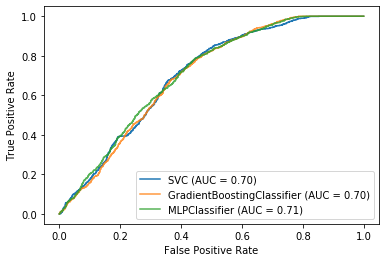

In [18]:
svc_disp = plot_roc_curve(svc, X_test, y_test)
ax = plt.gca()
gb_disp = plot_roc_curve(gb, X_test, y_test,ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
# gb_disp.plot(ax=ax, alpha=0.8)
plt.show()